# Detecção de pontos corporais

## Importação das bibliotecas

In [66]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import Image

## Carregamento da imagem

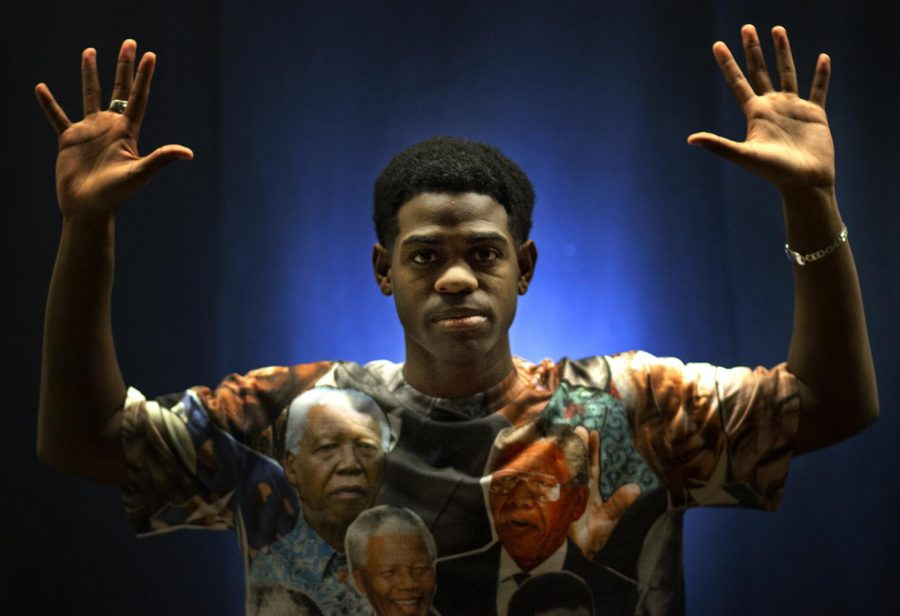

In [67]:
Image('handsup.jpg')

In [68]:
imagem = cv2.imread('handsup.jpg')

In [69]:
imagem.shape

(616, 900, 3)

In [70]:
337 * 600 * 3

606600

In [71]:
type(imagem)

numpy.ndarray

In [72]:
# Mean subtraction: https://www.pyimagesearch.com/2017/11/06/deep-learning-opencvs-blobfromimage-works/
imagem_blob = cv2.dnn.blobFromImage(image = imagem, scalefactor = 1.0/255,
                                    size = (imagem.shape[1], imagem.shape[0]))

In [73]:
imagem_blob.shape # batch

(1, 3, 616, 900)

In [74]:
type(imagem_blob)

numpy.ndarray

## Carregamento da rede neural pré-treinada

- Caffe Deep Learning framework: https://caffe.berkeleyvision.org/

In [75]:
network = cv2.dnn.readNetFromCaffe('pose_deploy_linevec_faster_4_stages.prototxt',
                                   'pose_iter_160000.caffemodel')

In [76]:
network.getLayerNames()

('conv1_1',
 'relu1_1',
 'conv1_2',
 'relu1_2',
 'pool1_stage1',
 'conv2_1',
 'relu2_1',
 'conv2_2',
 'relu2_2',
 'pool2_stage1',
 'conv3_1',
 'relu3_1',
 'conv3_2',
 'relu3_2',
 'conv3_3',
 'relu3_3',
 'conv3_4',
 'relu3_4',
 'pool3_stage1',
 'conv4_1',
 'relu4_1',
 'conv4_2',
 'relu4_2',
 'conv4_3_CPM',
 'relu4_3_CPM',
 'conv4_4_CPM',
 'relu4_4_CPM',
 'conv5_1_CPM_L1',
 'relu5_1_CPM_L1',
 'conv5_1_CPM_L2',
 'relu5_1_CPM_L2',
 'conv5_2_CPM_L1',
 'relu5_2_CPM_L1',
 'conv5_2_CPM_L2',
 'relu5_2_CPM_L2',
 'conv5_3_CPM_L1',
 'relu5_3_CPM_L1',
 'conv5_3_CPM_L2',
 'relu5_3_CPM_L2',
 'conv5_4_CPM_L1',
 'relu5_4_CPM_L1',
 'conv5_4_CPM_L2',
 'relu5_4_CPM_L2',
 'conv5_5_CPM_L1',
 'conv5_5_CPM_L2',
 'concat_stage2',
 'Mconv1_stage2_L1',
 'Mrelu1_stage2_L1',
 'Mconv1_stage2_L2',
 'Mrelu1_stage2_L2',
 'Mconv2_stage2_L1',
 'Mrelu2_stage2_L1',
 'Mconv2_stage2_L2',
 'Mrelu2_stage2_L2',
 'Mconv3_stage2_L1',
 'Mrelu3_stage2_L1',
 'Mconv3_stage2_L2',
 'Mrelu3_stage2_L2',
 'Mconv4_stage2_L1',
 'Mrelu4_sta

In [77]:
len(network.getLayerNames())

127

## Previsão de pontos corporais

In [78]:
network.setInput(imagem_blob)
output = network.forward()

In [79]:
output.shape

(1, 44, 77, 113)

In [80]:
posicao_largura = output.shape[3]
posicao_altura = output.shape[2]

In [81]:
posicao_largura, posicao_altura

(113, 77)

In [82]:
# minMaxLoc: https://docs.opencv.org/master/d2/de8/group__core__array.html#gab473bf2eb6d14ff97e89b355dac20707
numero_pontos = 15
pontos = []
threshold = 0.1
for i in range(numero_pontos):
  #print(i)
  mapa_confianca = output[0, i, :, :]
  #print(mapa_confianca)
  #print(len(mapa_confianca))
  _, confianca, _, ponto = cv2.minMaxLoc(mapa_confianca)
  #print(confianca)
  #print(ponto)

  x = int((imagem.shape[1] * ponto[0]) / posicao_largura)
  y = int((imagem.shape[0] * ponto[1]) / posicao_altura)
  #print(x, y)
  if confianca > threshold:
    cv2.circle(imagem, (x, y), 5, (0,255,0), thickness = -1)
    cv2.putText(imagem, '{}'.format(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255))
    pontos.append((x, y))
  else:
    pontos.append(None)

In [83]:
pontos

[(183, 392),
 (549, 384),
 (804, 104),
 (159, 152),
 (159, 152),
 (748, 152),
 (39, 88),
 (692, 136),
 (477, 208),
 (740, 32),
 None,
 (740, 96),
 (740, 24),
 (127, 48),
 (780, 120)]

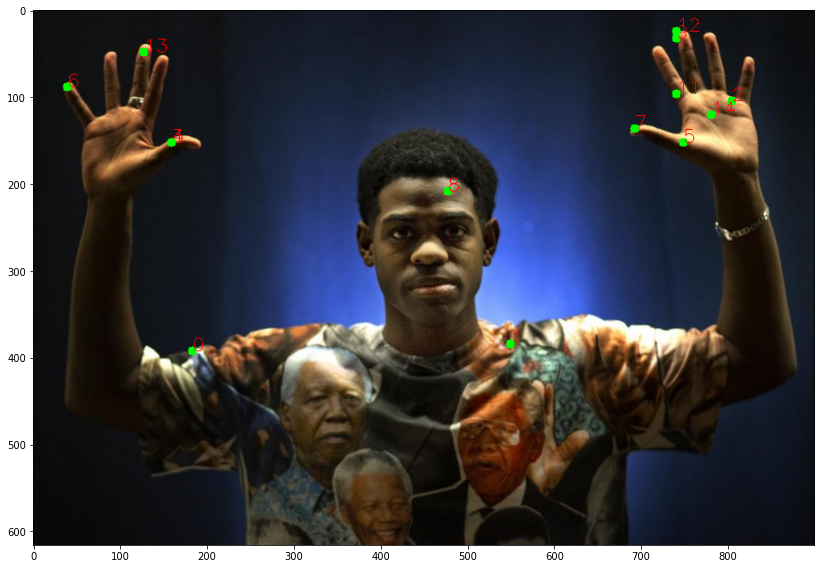

In [84]:
plt.figure(figsize=(14,10))
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB));

In [85]:
ponto_conexoes = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1, 14],
                  [14,8], [8,9], [9,10], [14,11], [11,12],[12,13]]

In [86]:
ponto_conexoes

[[0, 1],
 [1, 2],
 [2, 3],
 [3, 4],
 [1, 5],
 [5, 6],
 [6, 7],
 [1, 14],
 [14, 8],
 [8, 9],
 [9, 10],
 [14, 11],
 [11, 12],
 [12, 13]]

In [87]:
for conexao in ponto_conexoes:
  #print(conexao)
  parteA = conexao[0]
  parteB = conexao[1]
  #print(parteA, parteB)
  if pontos[parteA] and pontos[parteB]:
    cv2.line(imagem, pontos[parteA], pontos[parteB], (255,0,0))

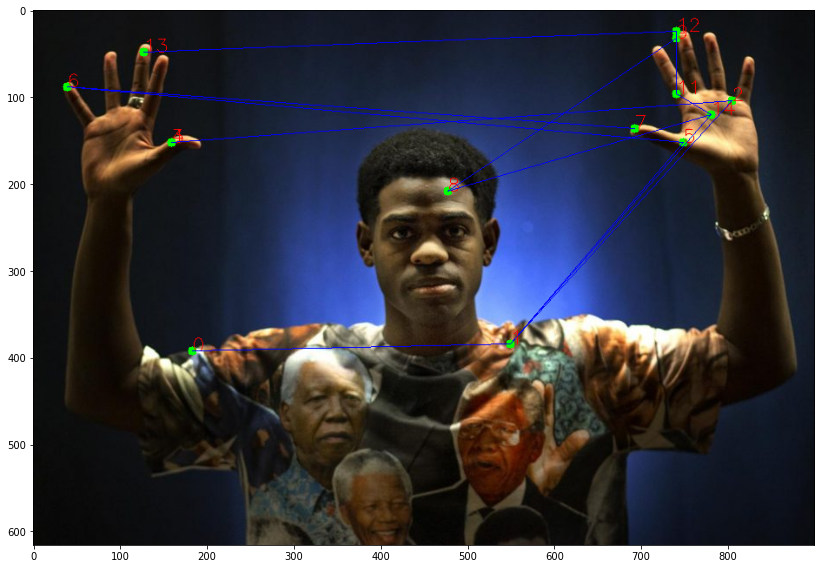

In [88]:
plt.figure(figsize=(14,10))
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB));

# Detecção de movimentos (braços acima da cabeça)

## Braços acima da cabeça em imagens

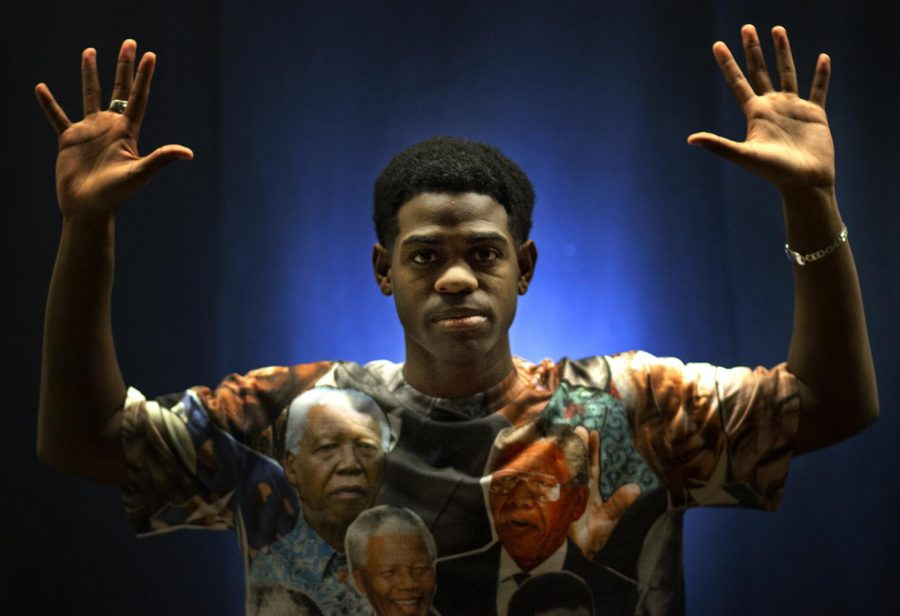

In [89]:
imagem2 = cv2.imread('handsup.jpg')
Image('handsup.jpg')

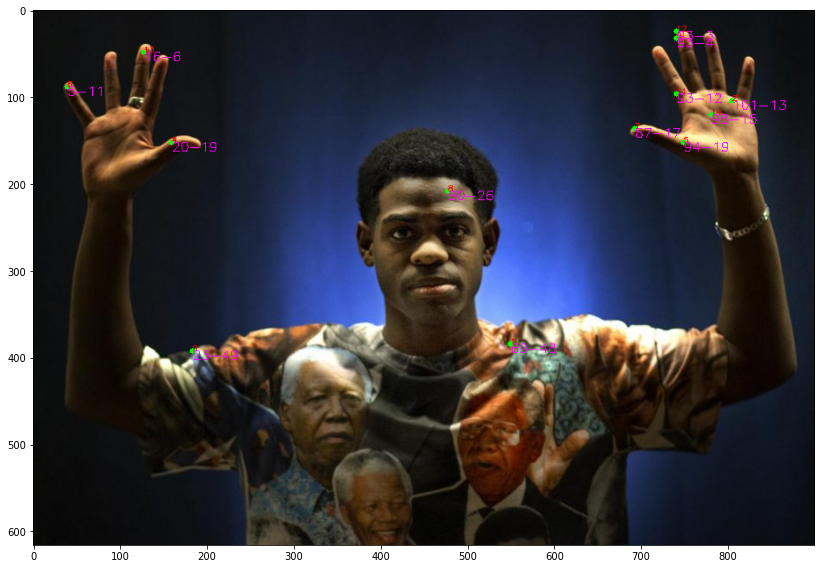

In [90]:
imagem2 = cv2.imread('handsup.jpg')
imagem_blob2 = cv2.dnn.blobFromImage(image = imagem2, scalefactor = 1.0 / 255, size = (imagem2.shape[1], imagem2.shape[0]))
network.setInput(imagem_blob2)
output2 = network.forward()
posicao_largura = output2.shape[3]
posicao_altura = output2.shape[2]
numero_pontos = 15
pontos = []
threshold = 0.1
for i in range(numero_pontos):
  mapa_confianca = output2[0, i, :, :]
  _, confianca, _, ponto = cv2.minMaxLoc(mapa_confianca) 
  x = int((imagem2.shape[1] * ponto[0]) / posicao_largura)
  y = int((imagem2.shape[0] * ponto[1]) / posicao_altura)
  
  if confianca > threshold:
    cv2.circle(imagem2, (x, y), 3, (0,255,0), thickness = -1)
    cv2.putText(imagem2, "{}".format(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, .3, (0, 0, 255))
    cv2.putText(imagem2, '{}-{}'.format(ponto[0], ponto[1]), (x, y + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,255))
    pontos.append((x, y))
  else:
    pontos.append(None)

plt.figure(figsize = [14,10])
plt.imshow(cv2.cvtColor(imagem2, cv2.COLOR_BGR2RGB));

In [91]:
def verifica_bracos_acima(pontos):
  cabeca, pulso_direito, pulso_esquerdo = 0, 0, 0
  for i, ponto in enumerate(pontos):
    #print(i, ponto)
    if i == 0:
      cabeca = ponto[1]
    elif i == 4:
      pulso_direito = ponto[1]
    elif i == 7:
      pulso_esquerdo = ponto[1]

  #print(cabeca, pulso_direito, pulso_esquerdo)
  if pulso_direito < cabeca and pulso_esquerdo < cabeca:
    return True
  else:
    return False

In [92]:
verifica_bracos_acima(pontos)

True